In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  


#for Franke function plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed

# For bootstrap 
from sklearn.utils import resample

from P1_definitions import * 

# For k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
""" Definition of the Franke function, production of the dataset and splitting the data into train and test """
""" The size of the dataset is defined here, but it would actually be better to run it after analyzing the dependence of the MSE on the complexity and number of 
    data points. Such analysis is performed, using OLS regression, in the second code below. """

n_datapoints = 25                    # Dimention of the dataset : (n_datapoints x n_datapoints) points.
x,y = xy_data_equally(n_datapoints)
x_y = np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))   # Matrix with x in the fisrt column and y in the second one

z = FrankeFunction(x, y)  
coeff_noise = 0.05
z_noise = FrankeFunction_noise(x,y,coeff_noise)
z_noise_plot = z_noise
z_noise = z_noise.ravel()   # From matrix (n,n) to tuple (n*n,)

# Splitting the data into train and test
""" the test size is the percentage of data we use as testing, in this case it's 20%
    random_stateint = controls the shuffling applied to the data before applying the split. Pass an int for reproducible output 
                     across multiple function calls. See Glossary.
    shufflebool = whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None."""
x_y_train, x_y_test, z_train, z_test = train_test_split(x_y, z_noise.reshape(z_noise.shape[0],1), test_size=0.2, random_state=42, shuffle=True)

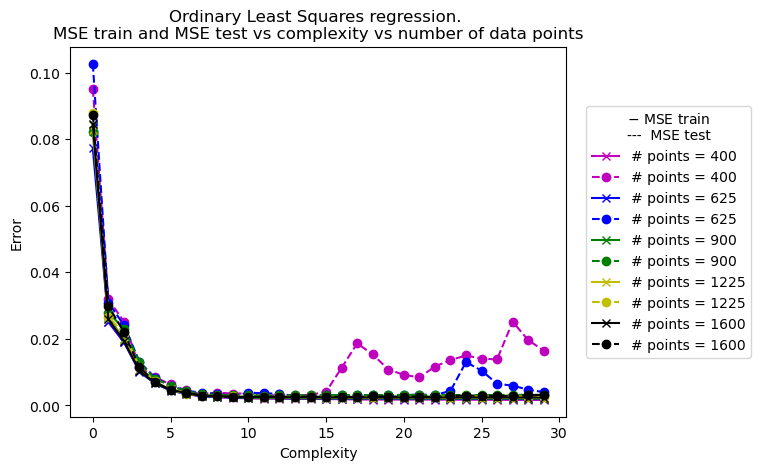

In [4]:
""" Ordinary Least Square (OLS) analysis: MSE error analysis with respect to the complexity if the model and the number of data points. 
                                          maxdegree is used to analyze the role of model complexity
                                          n_max is used to analyze the role of the number of data point """

case = 'OLS'
c_dp_OLS_maxdegree = 30      # polynomial maxdegree
OLS_n_max = 40         # # Dimention of the dataset : (OLS_n_max x OLS_n_max) points.
OLS_n_iterations = 5    # Number of sets with different number of data points
OLS_c_dp_n = np.linspace(20, OLS_n_max, num = OLS_n_iterations, dtype= int)

c_dp_OLS_MSE_train = np.zeros((c_dp_OLS_maxdegree, OLS_n_iterations))
c_dp_OLS_MSE_test = np.zeros((c_dp_OLS_maxdegree, OLS_n_iterations))
c_dp_polydegree = np.zeros(c_dp_OLS_maxdegree)

# Computing MSE train and test
j = 0
for n in OLS_c_dp_n:
    # Computing the data set
    c_dp_OLS_x,c_dp_OLS_y = xy_data_equally(n)
    c_dp_OLS_x_y = np.hstack((c_dp_OLS_x.ravel().reshape(c_dp_OLS_x.ravel().shape[0],1),c_dp_OLS_y.ravel().reshape(c_dp_OLS_y.ravel().shape[0],1)))   # Matrix with x in the fisrt column and y in the second one
    c_dp_OLS_z_noise = FrankeFunction_noise(c_dp_OLS_x,c_dp_OLS_y,coeff_noise)    # coeff_noise = 0.05
    c_dp_OLS_z_noise = c_dp_OLS_z_noise.ravel()   # From matrix (n,n) to tuple (n*n,)

    c_dp_OLS_x_y_train, c_dp_OLS_x_y_test, c_dp_OLS_z_train, c_dp_OLS_z_test = train_test_split(c_dp_OLS_x_y, c_dp_OLS_z_noise.reshape(c_dp_OLS_z_noise.shape[0],1), test_size=0.2, random_state=42, shuffle=True)
    
    for i in range(c_dp_OLS_maxdegree):
        # Computing training and test design matrices
        c_dp_OLS_design_matrix_train = Design_Matrix_calc(i, c_dp_OLS_x_y_train)
        c_dp_OLS_design_matrix_test = Design_Matrix_calc(i, c_dp_OLS_x_y_test)
        # Scaling the data with respect to the training data 
        
        c_dp_OLS_beta= beta_calc(c_dp_OLS_design_matrix_train, c_dp_OLS_z_train)
        # Calculation of MSE of both training and test data sets
        c_dp_OLS_ztilde= c_dp_OLS_design_matrix_train @ c_dp_OLS_beta
        c_dp_OLS_zpredict = c_dp_OLS_design_matrix_test @ c_dp_OLS_beta
        c_dp_OLS_MSE_train[i,j] = MSE_function(c_dp_OLS_z_train, c_dp_OLS_ztilde)
        c_dp_OLS_MSE_test[i,j] = MSE_function(c_dp_OLS_z_test, c_dp_OLS_zpredict)
        c_dp_polydegree[i] = i

    j += 1 


# Plot MSE train and MSE test vs complexity and number of datapoint

color = np.array((['m-x' , 'b-x', 'g-x', 'y-x', 'k-x'], ['m--o' , 'b--o', 'g--o', 'y--o', 'k--o']))
for i in range(OLS_n_iterations):
    plt.plot(c_dp_polydegree, c_dp_OLS_MSE_train[:,i], color[0,i], label='# points = {}'.format(OLS_c_dp_n[i] * OLS_c_dp_n[i]))
    plt.plot(c_dp_polydegree, c_dp_OLS_MSE_test[:,i], color[1,i], label='# points = {}'.format(OLS_c_dp_n[i] * OLS_c_dp_n[i]))

plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Ordinary Least Squares regression. \n' + 'MSE train and MSE test vs complexity vs number of data points')
# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title=r'$-$ MSE train' + '\n' + '---  MSE test')
plt.show()


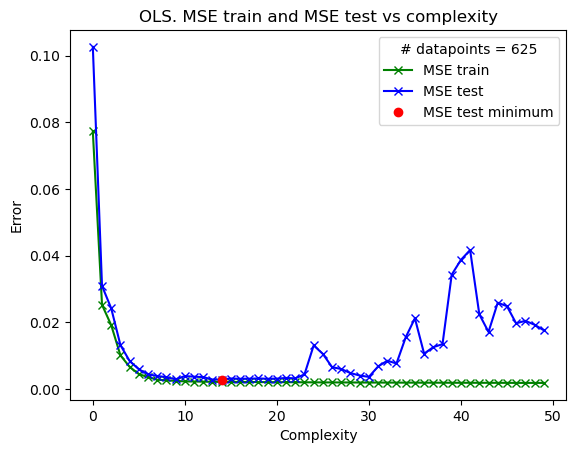

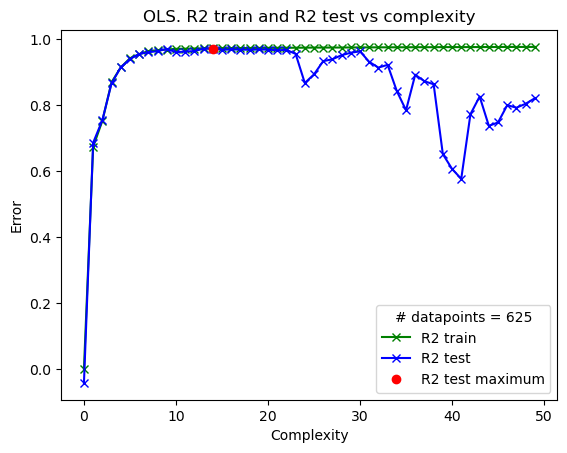

With 625 datapoints, the smallest mean squared error is 0.0027958963436022707 and it is obtained with the model with polynomial degree = 14,
while the greater R2 score is 0.9715914477386443 and it is obtained with the model with polynomial degree = 14.


In [5]:
""" Ordinary Least Square (OLS) analysis:
        MSE error and R-squared analysis with respect to the complexity of the model """

# MSE error vs complexity 
OLS_maxdegree = 100      # polynomial maxdegree
OLS_polydegree = np.zeros(OLS_maxdegree)    # array of polynomial degree
OLS_MSE_train = np.zeros(OLS_maxdegree)
OLS_MSE_test = np.zeros(OLS_maxdegree)
OLS_R2_train = np.zeros(OLS_maxdegree)
OLS_R2_test = np.zeros(OLS_maxdegree)

for i in range(OLS_maxdegree):
    # Computing training and test design matrices
    OLS_design_matrix_train = Design_Matrix_calc(i, x_y_train) 
    OLS_design_matrix_test = Design_Matrix_calc(i, x_y_test)

    OLS_beta= beta_calc(OLS_design_matrix_train, z_train)
    
    # Calculation of MSE and R2 of both training and test data sets
    OLS_ztilde= OLS_design_matrix_train @ OLS_beta
    OLS_zpredict = OLS_design_matrix_test @ OLS_beta
    OLS_MSE_train[i] = MSE_function(z_train, OLS_ztilde)
    OLS_MSE_test[i] = MSE_function(z_test, OLS_zpredict)
    OLS_R2_train[i] = R2_function(z_train, OLS_ztilde)
    OLS_R2_test[i] = R2_function(z_test, OLS_zpredict)
    OLS_polydegree[i] = i 

# Seeking for the smallest test MSE
OLS_MSE_min = np.min(OLS_MSE_test)
OLS_MSE_min_position = np.where(OLS_MSE_test == OLS_MSE_test.min())[0]

# Seeking for the greater test R2
OLS_R2_max = np.max(OLS_R2_test)
OLS_R2_max_position = np.where(OLS_R2_test == OLS_R2_test.max())[0]

# Plot: MSE 
plt.figure(1)
plt.plot(OLS_polydegree, OLS_MSE_train, 'g-x', label='MSE train')
plt.plot(OLS_polydegree, OLS_MSE_test, 'b-x', label='MSE test')
plt.plot(OLS_MSE_min_position, OLS_MSE_min, 'ro', label='MSE test minimum', linewidth = 3)
plt.legend(title='# datapoints = {}'.format(n_datapoints * n_datapoints))
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('OLS. MSE train and MSE test vs complexity')
plt.show()

# Plot: R2
plt.figure(2)
plt.plot(OLS_polydegree, OLS_R2_train, 'g-x', label='R2 train')
plt.plot(OLS_polydegree, OLS_R2_test, 'b-x', label='R2 test')
plt.plot(OLS_R2_max_position, OLS_R2_max, 'ro', label='R2 test maximum', linewidth = 3)
plt.legend(title='# datapoints = {}'.format(n_datapoints * n_datapoints))
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('OLS. R2 train and R2 test vs complexity')
plt.show()

print('With {} datapoints, the smallest mean squared error is {} and it is obtained with the model with polynomial degree = {},'.format(n_datapoints*n_datapoints, OLS_MSE_min, OLS_MSE_min_position[0]))
print('while the greater R2 score is {} and it is obtained with the model with polynomial degree = {}.'.format(OLS_R2_max, OLS_R2_max_position[0]))


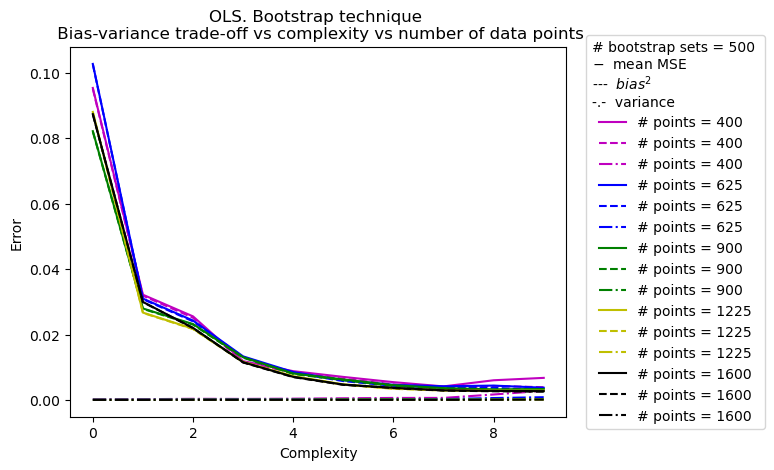

In [6]:
""" OLS analysis. Bootstrap and Bias-variance tradeoff vs complexity vs number of data point """

OLS_n_boostraps = 500       # number of bootstrap sets
c_dp_OLS_Bs_maxdegree = 10    # Degree with the minimum MSEtest obtained before
OLS_Bs_n_max = 40                        
OLS_Bs_n_iterations = 5                    # Number of sets with different number of data points
OLS_Bs_c_dp_n = np.linspace(20, OLS_Bs_n_max, num = OLS_Bs_n_iterations, dtype= int) 
c_dp_OLS_bias = np.zeros((c_dp_OLS_Bs_maxdegree,OLS_Bs_n_iterations))
c_dp_OLS_variance = np.zeros((c_dp_OLS_Bs_maxdegree,OLS_Bs_n_iterations))
c_dp_OLS_MSE_mean = np.zeros((c_dp_OLS_Bs_maxdegree,OLS_Bs_n_iterations))
c_dp_Bs_polydegree = np.zeros(c_dp_OLS_Bs_maxdegree)

# Computing MSE train and test
j = 0
for n in OLS_Bs_c_dp_n:
    # Computing the data set
    c_dp_OLS_Bs_x,c_dp_OLS_Bs_y = xy_data_equally(n)
    c_dp_OLS_Bs_x_y = np.hstack((c_dp_OLS_Bs_x.ravel().reshape(c_dp_OLS_Bs_x.ravel().shape[0],1),c_dp_OLS_Bs_y.ravel().reshape(c_dp_OLS_Bs_y.ravel().shape[0],1)))   # Matrix with x in the fisrt column and y in the second one
    c_dp_OLS_Bs_z_noise = FrankeFunction_noise(c_dp_OLS_Bs_x,c_dp_OLS_Bs_y,coeff_noise)    # coeff_noise = 0.05
    c_dp_OLS_Bs_z_noise = c_dp_OLS_Bs_z_noise.ravel()   # From matrix (n,n) to tuple (n*n,)

    c_dp_OLS_Bs_x_y_train, c_dp_OLS_Bs_x_y_test, c_dp_OLS_Bs_z_train, c_dp_OLS_Bs_z_test = train_test_split(c_dp_OLS_Bs_x_y, c_dp_OLS_Bs_z_noise.reshape(c_dp_OLS_Bs_z_noise.shape[0],1), test_size=0.2, random_state=42, shuffle=True)
    
    for i in range(c_dp_OLS_Bs_maxdegree):
        # function scaled_bootstrap() scales the features, function bootstrap() does not scale the features.
        c_dp_OLS_MSE_mean[i,j], c_dp_OLS_Bs_z_pred = bootstrap(OLS_n_boostraps, i, c_dp_OLS_Bs_x_y_train, c_dp_OLS_Bs_z_train, c_dp_OLS_Bs_x_y_test, c_dp_OLS_Bs_z_test, 'OLS', 0)
        c_dp_OLS_bias[i,j] = np.mean( (c_dp_OLS_Bs_z_test - np.mean(c_dp_OLS_Bs_z_pred, axis=1, keepdims=True))**2 )
        c_dp_OLS_variance[i,j] = np.mean( np.var(c_dp_OLS_Bs_z_pred, axis=1, keepdims=True) )
        c_dp_Bs_polydegree[i] = i
    j += 1 

# Plot mean MSE, bias^2 and variance 

color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-'], ['m--' , 'b--', 'g--', 'y--', 'k--'], ['m-.' , 'b-.', 'g-.', 'y-.', 'k-.']))
for i in range(OLS_Bs_n_iterations):
    plt.plot(c_dp_Bs_polydegree, c_dp_OLS_MSE_mean[:,i], color[0,i], label='# points = {}'.format(OLS_Bs_c_dp_n[i] * OLS_Bs_c_dp_n[i]))
    plt.plot(c_dp_Bs_polydegree, c_dp_OLS_bias[:,i], color[1,i], label='# points = {}'.format(OLS_Bs_c_dp_n[i] * OLS_Bs_c_dp_n[i]))
    plt.plot(c_dp_Bs_polydegree, c_dp_OLS_variance[:,i], color[2,i], label='# points = {}'.format(OLS_Bs_c_dp_n[i] * OLS_Bs_c_dp_n[i]))

#plt.plot(R_R2_max_position[0][0], R_R2_max, 'ro', label='R2 score maximum', linewidth = 3)
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('OLS. Bootstrap technique \n' + ' Bias-variance trade-off vs complexity vs number of data points')
# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title='# bootstrap sets = {} \n'.format(OLS_n_boostraps) + r'$-$  mean MSE' + '\n' + r'---  $bias^2$' + '\n' + '-.-  variance ')
plt.show()



********************** Model complexity: polynomial of degree 0 **********************
Error:1.027655e-01
Bias^2:1.026014e-01
Var:1.640930e-04
1.027655e-01 >= 1.026014e-01 + 1.640930e-04 = 1.027655e-01
********************** Model complexity: polynomial of degree 1 **********************
Error:3.108967e-02
Bias^2:3.093649e-02
Var:1.531774e-04
3.108967e-02 >= 3.093649e-02 + 1.531774e-04 = 3.108967e-02
********************** Model complexity: polynomial of degree 2 **********************
Error:2.436299e-02
Bias^2:2.411568e-02
Var:2.473098e-04
2.436299e-02 >= 2.411568e-02 + 2.473098e-04 = 2.436299e-02
********************** Model complexity: polynomial of degree 3 **********************
Error:1.333868e-02
Bias^2:1.309371e-02
Var:2.449682e-04
1.333868e-02 >= 1.309371e-02 + 2.449682e-04 = 1.333868e-02
********************** Model complexity: polynomial of degree 4 **********************
Error:8.572416e-03
Bias^2:8.325289e-03
Var:2.471278e-04
8.572416e-03 >= 8.325289e-03 + 2.471278e-04 = 8.5

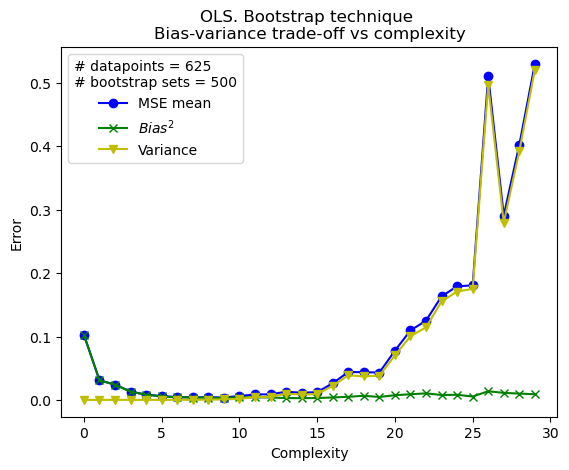

In [7]:
""" OLS analysis. BOOTSTRAP and Bias-variance tradeoff with respect the complexity of the model"""

# Bootstrap and Bias-variance tradeoff
OLS_n_boostraps = 500       # number of bootstrap sets
OLS_Bs_maxdegree = 30

OLS_Bs_bias = np.zeros(OLS_Bs_maxdegree)
OLS_Bs_variance = np.zeros(OLS_Bs_maxdegree)
OLS_Bs_polydegree = np.zeros(OLS_Bs_maxdegree)
OLS_Bs_MSE_mean = np.zeros(OLS_Bs_maxdegree)

# Computing MSE train and test
for j in range(OLS_Bs_maxdegree):
    # function scaled_bootstrap() scales the features, function bootstrap() does not scale the features.
    OLS_Bs_MSE_mean[j], OLS_Bs_z_pred = bootstrap(OLS_n_boostraps, j, x_y_train, z_train, x_y_test, z_test, 'OLS', 0)
    OLS_Bs_bias[j] = np.mean( (z_test - np.mean(OLS_Bs_z_pred, axis=1, keepdims=True))**2 )
    OLS_Bs_variance[j] = np.mean( np.var(OLS_Bs_z_pred, axis=1, keepdims=True) )
    OLS_Bs_polydegree[j] = j

    print('********************** Model complexity: polynomial of degree {} **********************'.format(j))
    print('Error:{:e}'.format(OLS_Bs_MSE_mean[j]))
    print('Bias^2:{:e}'.format(OLS_Bs_bias[j]))
    print('Var:{:e}'.format(OLS_Bs_variance[j]))
    print('{:e} >= {:e} + {:e} = {:e}'.format(OLS_Bs_MSE_mean[j], OLS_Bs_bias[j], OLS_Bs_variance[j], OLS_Bs_bias[j]+OLS_Bs_variance[j]))

# Note: The use of keepdims=True is important in the calculation of bias as this maintains the column vector form. Dropping this yields very unexpected results.

plt.plot(OLS_Bs_polydegree, OLS_Bs_MSE_mean, 'b-o', label='MSE mean')
plt.plot(OLS_Bs_polydegree, OLS_Bs_bias, 'g-x', label=r'$Bias^2$')
plt.plot(OLS_Bs_polydegree, OLS_Bs_variance, 'y-v', label='Variance')
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('OLS. Bootstrap technique \n' + 'Bias-variance trade-off vs complexity')
plt.legend(title='# datapoints = {} \n'.format(n_datapoints * n_datapoints)  + '# bootstrap sets = {}'.format(OLS_n_boostraps))
plt.show()


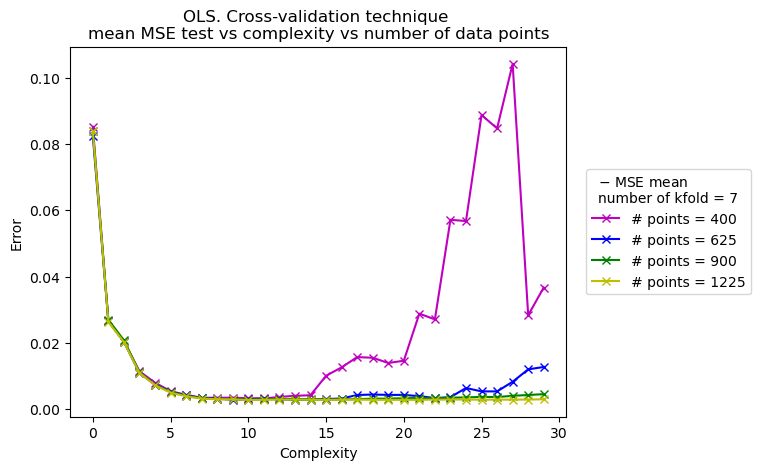

In [8]:
""" OLS analysis. Cross-validation and Bias-variance tradeoff. MSE error vs complexity vs number of data points """


c_dp_OLS_Cs_maxdegree = 30 
OLS_Cs_n_max = 40                        
OLS_Cs_n_iterations = 5                    # Number of sets with different number of data points
OLS_Cs_c_dp_n = np.linspace(20, OLS_Cs_n_max, num = OLS_Cs_n_iterations, dtype= int)              
c_dp_OLS_Cs_polydegree = np.zeros(c_dp_OLS_Cs_maxdegree)
# Initialize a KFold instance, choose k in [5,10]
k = 7
kfold = KFold(n_splits = k, shuffle=True, random_state= 42)             # shuffle decreases the mean square error

c_dp_OLS_Cs_KFold_MSE = np.zeros((c_dp_OLS_Cs_maxdegree, OLS_Cs_n_iterations))

j = 0
for n in OLS_Cs_c_dp_n:
    # Computing the data set
    c_dp_OLS_Cs_x,c_dp_OLS_Cs_y = xy_data_equally(n)
    c_dp_OLS_Cs_x_y = np.hstack((c_dp_OLS_Cs_x.ravel().reshape(c_dp_OLS_Cs_x.ravel().shape[0],1),c_dp_OLS_Cs_y.ravel().reshape(c_dp_OLS_Cs_y.ravel().shape[0],1)))   # Matrix with x in the fisrt column and y in the second one
    c_dp_OLS_Cs_z_noise = FrankeFunction_noise(c_dp_OLS_Cs_x,c_dp_OLS_Cs_y,coeff_noise)    # coeff_noise = 0.05
    c_dp_OLS_Cs_z_noise = c_dp_OLS_Cs_z_noise.ravel()   # From matrix (n,n) to tuple (n*n,)

    for i in range(c_dp_OLS_Cs_maxdegree):
        # Perform the cross-validation to estimate MSE. Function scaled_validation_scaled() scales the features, function validation_scaled() does not scale the features.
        c_dp_OLS_Cs_KFold_MSE[i,j] = cross_validation(kfold, k, c_dp_OLS_Cs_x_y, c_dp_OLS_Cs_z_noise, i, 'OLS', 0)
        c_dp_OLS_Cs_polydegree[i] = i

    j += 1

# Plot mean MSE error test vs complexity vs number of data points
color = np.array((['m-x' , 'b-x', 'g-x', 'y-x', 'k-x']))

for i in range(4):
    plt.plot(c_dp_OLS_Cs_polydegree, c_dp_OLS_Cs_KFold_MSE[:,i], color[i], label='# points = {}'.format(OLS_c_dp_n[i] * OLS_c_dp_n[i]))
    
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('OLS. Cross-validation technique \n' + 'mean MSE test vs complexity vs number of data points')
# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title=r'$-$ MSE mean' + '\n' + 'number of kfold = {}'.format(k))
plt.show()


In [ ]:
""" OLS analysis. Cross-validation and Bias-variance tradeoff """

# Decide degree on polynomial to fit
OLS_Cs_maxdegree = 50              
OLS_Cs_polydegree = np.zeros(OLS_Cs_maxdegree)
# Initialize a KFold instance, choose k in [5,10]
k = 7
kfold = KFold(n_splits = k, shuffle=True, random_state= 42)             # shuffle decreases the mean square error
OLS_KFold_MSE = np.zeros(OLS_Cs_maxdegree)

for j in range(OLS_Cs_maxdegree):
    # Perform the cross-validation to estimate MSE. Function scaled_validation_scaled() scales the features, function validation_scaled() does not scale the features.
    OLS_KFold_MSE[j] = cross_validation(kfold, k, x_y, z_noise, j, 'OLS', 0)
    OLS_Cs_polydegree[j] = j

# Plot mean MSE error test
plt.plot(OLS_Cs_polydegree, OLS_KFold_MSE, 'r-x', label='MSE mean')
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('OLS. Cross-validation technique \n' + 'mean MSE test vs complexity')
plt.legend(title='# datapoints = {} \n'.format(n_datapoints * n_datapoints) + 'number of kfold = {}'.format(k))
plt.show()



*************************************** RIDGE ***************************************

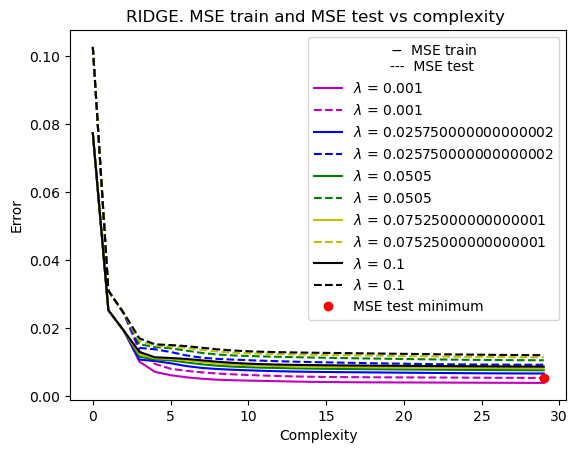

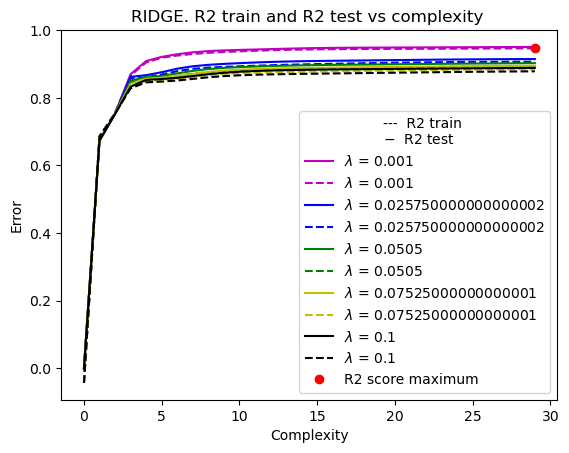

With 625 datapoints, the smallest mean squared error is 0.005300056424850714 and it is obtained with the model with polynomial degree = 29 and regularization term lambda = 0.001,
while the greatest R-squared is 0.946147170198909 and it is obtained with the model with polynomial degree = 29 and regularization term lambda = 0.001.


In [10]:
""" RIDGE analysis 
MSE error and R-squared analysis with respect to the complexity of the model and regularization term
"""

case = 'ridge'

# MSE error vs complexity
R_nlmbs = 5
R_lmb = np.linspace(0.001, 0.1, R_nlmbs)
#R_lmb = np.array((0.1, 0.5, 1.0))
R_maxdegree = 30
R_MSE_train = np.zeros((R_maxdegree, len(R_lmb)))
R_MSE_test = np.zeros((R_maxdegree, len(R_lmb)))
R_R2_train = np.zeros((R_maxdegree, len(R_lmb)))
R_R2_test = np.zeros((R_maxdegree, len(R_lmb)))
R_polydegree = np.zeros(R_maxdegree)

j = 0
for lmb in R_lmb:
    for i in range(R_maxdegree):
        # Training
        R_design_matrix_train = Design_Matrix_calc(i, x_y_train)
        # Testing 
        R_design_matrix_test = Design_Matrix_calc(i, x_y_test)
        # Prediction
        R_beta_= Ridge_beta_calc(R_design_matrix_train, z_train, lmb)
        ztilde_R= R_design_matrix_train @ R_beta_
        zpredict_R = R_design_matrix_test @ R_beta_
        # Calculation of MSE and R2 of both training and test data sets
        R_MSE_train[i,j] = MSE_function(z_train, ztilde_R)
        R_MSE_test[i,j] = MSE_function(z_test, zpredict_R)
        R_R2_train[i,j] = R2_function(z_train, ztilde_R)
        R_R2_test[i,j] = R2_function(z_test, zpredict_R)
        R_polydegree[i] = i 
    j+= 1

    # Seeking for the smallest test MSE
R_MSE_min = np.min(R_MSE_test)
R_MSE_min_position = np.where(R_MSE_test == R_MSE_test.min())

# Seeking for the greatest test R2 score
R_R2_max = np.max(R_R2_test)
R_R2_max_position = np.where(R_R2_test == R_R2_test.max())

# Plot MSE error train and test
plt.figure(1)
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-'], ['m--' , 'b--', 'g--', 'y--', 'k--']))
for i in range(len(R_lmb)):
    plt.plot(R_polydegree, R_MSE_train[:,i], color[0,i], label=r'$\lambda$ = {}'.format(R_lmb[i]))
    plt.plot(R_polydegree, R_MSE_test[:,i], color[1,i], label=r'$\lambda$ = {}'.format(R_lmb[i]))

plt.plot(R_MSE_min_position[0][0], R_MSE_min, 'ro', label='MSE test minimum', linewidth = 3)
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('RIDGE. MSE train and MSE test vs complexity ')
plt.legend(title=r'$-$  MSE train' +  '\n' + '---  MSE test ')
plt.show()

# Plot R-squared error train and test
plt.figure(2)
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-'], ['m--' , 'b--', 'g--', 'y--', 'k--']))
for i in range(len(R_lmb)):
    plt.plot(R_polydegree, R_R2_train[:,i], color[0,i], label=r'$\lambda$ = {}'.format(R_lmb[i]))
    plt.plot(R_polydegree, R_R2_test[:,i], color[1,i], label=r'$\lambda$ = {}'.format(R_lmb[i]))

plt.plot(R_R2_max_position[0][0], R_R2_max, 'ro', label='R2 score maximum', linewidth = 3)
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('RIDGE. R2 train and R2 test vs complexity ')
plt.legend(title='---  R2 train \n' + r'$-$  R2 test ')
plt.show()

print('With {} datapoints, the smallest mean squared error is {} and it is obtained with the model with polynomial degree = {} and regularization term lambda = {},'.format(n_datapoints*n_datapoints, R_MSE_min, R_MSE_min_position[0][0], R_lmb[R_MSE_min_position[1][0]]))
print('while the greatest R-squared is {} and it is obtained with the model with polynomial degree = {} and regularization term lambda = {}.'.format(R_R2_max, R_R2_max_position[0][0], R_lmb[R_R2_max_position[1][0]]))


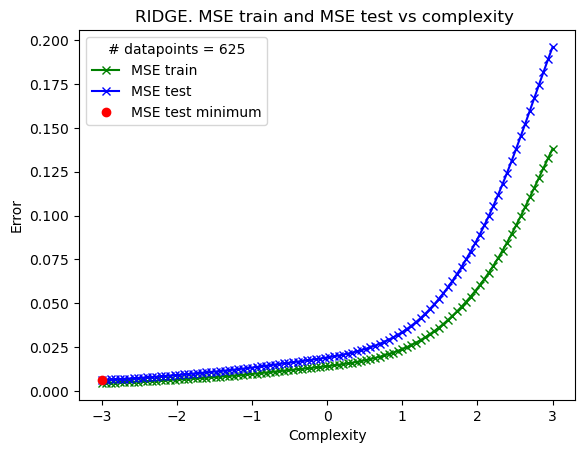

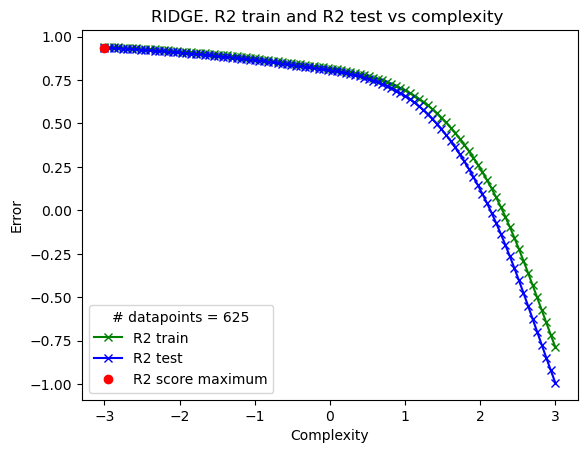

With 625 datapoints, the smallest mean squared error is 0.006360522200440994 and it is obtained with the model with polynomial degree = 9 and regularization term lambda = [0.001],
while the greatest R-squared is 0.9353719862489847 and it is obtained with the model with polynomial degree = 9 and regularization term lambda = [0.001].


In [12]:
""" RIDGE analysis 
MSE error and R-squared analysis with respect to the regularization term
"""

case = 'ridge'

R_nlmbs = 100
R_degree = 9
R_lmb = np.logspace(-3, 3, R_nlmbs)

R_MSE_train = np.zeros(len(R_lmb))
R_MSE_test = np.zeros(len(R_lmb))
R_R2_train = np.zeros(len(R_lmb))
R_R2_test = np.zeros(len(R_lmb))

# Training
R_design_matrix_train = Design_Matrix_calc(R_degree, x_y_train)
# Testing 
R_design_matrix_test = Design_Matrix_calc(R_degree, x_y_test)

j = 0
for lmb in R_lmb:
    # Prediction
    R_beta_= Ridge_beta_calc(R_design_matrix_train, z_train, lmb)
    ztilde_R= R_design_matrix_train @ R_beta_
    zpredict_R = R_design_matrix_test @ R_beta_
    # Calculation of MSE and R2 of both training and test data sets
    R_MSE_train[j] = MSE_function(z_train, ztilde_R)
    R_MSE_test[j] = MSE_function(z_test, zpredict_R)
    R_R2_train[j] = R2_function(z_train, ztilde_R)
    R_R2_test[j] = R2_function(z_test, zpredict_R)
    j+= 1

# Seeking for the smallest test MSE
R_MSE_min = np.min(R_MSE_test)
R_MSE_min_position = np.where(R_MSE_test == R_MSE_test.min())[0]

# Seeking for the greatest test R2 score
R_R2_max = np.max(R_R2_test)
R_R2_max_position = np.where(R_R2_test == R_R2_test.max())[0]

# Plot MSE error train and test
plt.figure(1)
plt.plot(np.log10(R_lmb), R_MSE_train, 'g-x', label='MSE train')
plt.plot(np.log10(R_lmb), R_MSE_test, 'b-x', label='MSE test')
plt.plot(np.log10(R_lmb[R_MSE_min_position]), R_MSE_min, 'ro', label='MSE test minimum', linewidth = 3)
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('RIDGE. MSE train and MSE test vs complexity ')
plt.legend(title='# datapoints = {}'.format(n_datapoints * n_datapoints))
plt.show()

# Plot R-squared error train and test
plt.figure(2)
plt.plot(np.log10(R_lmb), R_R2_train, 'g-x', label='R2 train')
plt.plot(np.log10(R_lmb), R_R2_test, 'b-x', label='R2 test')
plt.plot(np.log10(R_lmb[R_R2_max_position]), R_R2_max, 'ro', label='R2 score maximum', linewidth = 3)
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('RIDGE. R2 train and R2 test vs complexity ')
plt.legend(title='# datapoints = {}'.format(n_datapoints * n_datapoints))
plt.show()


print('With {} datapoints, the smallest mean squared error is {} and it is obtained with the model with polynomial degree = {} and regularization term lambda = {},'.format(n_datapoints*n_datapoints, R_MSE_min, R_degree, R_lmb[R_MSE_min_position]))
print('while the greatest R-squared is {} and it is obtained with the model with polynomial degree = {} and regularization term lambda = {}.'.format(R_R2_max, R_degree, R_lmb[R_R2_max_position]))



In [14]:
""" RIDGE analysis. BOOTSTRAP and Bias-variance tradeoff with respect the regularization parameter"""

R_n_boostraps = 500       # number of bootstrap sets
R_maxdegree = 20
R_nlambdas = 5

# The following (m x n_bootstraps) matrix holds the column vectors y_pred for each bootstrap iteration.
R_Bs_bias = np.zeros((R_maxdegree, R_nlambdas))
R_Bs_variance = np.zeros((R_maxdegree, R_nlambdas))
R_Bs_polydegree = np.zeros(R_maxdegree)
R_Bs_lambdas = np.linspace(0.001, 0.1, R_nlambdas)
R_Bs_MSE_mean = np.zeros((R_maxdegree, R_nlambdas))

i = 0
for lmb in R_Bs_lambdas:
    for j in range(R_maxdegree):
        R_Bs_MSE_mean[j,i], z_pred =  bootstrap(R_n_boostraps, j, x_y_train, z_train, x_y_test, z_test, 'ridge', lmb)
        R_Bs_polydegree[j] = j

        R_Bs_bias[j,i] = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
        R_Bs_variance[j,i] = np.mean( np.var(z_pred, axis=1, keepdims=True) )
        
        print('********************** Regularization parameter: lambda = {}. Model complexity: polynomial of degree {} **********************'.format(lmb, j))
        print('Error:{:e}'.format(R_Bs_MSE_mean[j,i]))
        print('Bias^2:{:e}'.format(R_Bs_bias[j,i]))
        print('Var:{:e}'.format(R_Bs_variance[j,i]))
        print('{:e} >= {:e} + {:e} = {:e}'.format(R_Bs_MSE_mean[j,i], R_Bs_bias[j,i], R_Bs_variance[j,i], R_Bs_bias[j,i]+R_Bs_variance[j,i]))
    i+= 1


# Plot MSE error train and test
plt.figure(1)
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-'], ['m--' , 'b--', 'g--', 'y--', 'k--'], ['m-.' , 'b-.', 'g-.', 'y-.', 'k-.']))
for i in range(R_nlambdas):
    plt.plot(R_Bs_polydegree, R_Bs_MSE_mean[:,i], color[0,i], label=r'$\lambda$ = {}'.format(R_lmb[i]))
    plt.plot(R_Bs_polydegree, R_Bs_bias[:,i], color[1,i], label=r'$\lambda$ = {}'.format(R_lmb[i]))
    plt.plot(R_Bs_polydegree, R_Bs_variance[:,i], color[2,i], label=r'$\lambda$ = {}'.format(R_lmb[i]))

plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Ridge. Bootstrap technique \n' + 'Bias-variance trade-off vs complexity vs regularization parameter')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title= '# datapoints = {} \n'.format(n_datapoints * n_datapoints) + '# bootstrap sets = {}\n'.format(R_n_boostraps) + '---  Bias^2 \n' + ' -.- Variance \n' + r'$-$  MSE mean ' )
plt.show


********************** Regularization parameter: lambda = 0.001. Model complexity: polynomial of degree 0 **********************
Error:1.028567e-01
Bias^2:1.027016e-01
Var:1.550930e-04
1.028567e-01 >= 1.027016e-01 + 1.550930e-04 = 1.028567e-01
********************** Regularization parameter: lambda = 0.001. Model complexity: polynomial of degree 1 **********************
Error:3.103181e-02
Bias^2:3.086126e-02
Var:1.705555e-04
3.103181e-02 >= 3.086126e-02 + 1.705555e-04 = 3.103181e-02
********************** Regularization parameter: lambda = 0.001. Model complexity: polynomial of degree 2 **********************
Error:2.438769e-02
Bias^2:2.415179e-02
Var:2.358932e-04
2.438769e-02 >= 2.415179e-02 + 2.358932e-04 = 2.438769e-02
********************** Regularization parameter: lambda = 0.001. Model complexity: polynomial of degree 3 **********************
Error:1.332798e-02
Bias^2:1.309446e-02
Var:2.335176e-04
1.332798e-02 >= 1.309446e-02 + 2.335176e-04 = 1.332798e-02
********************** R

TypeError: object of type 'int' has no len()

<Figure size 640x480 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

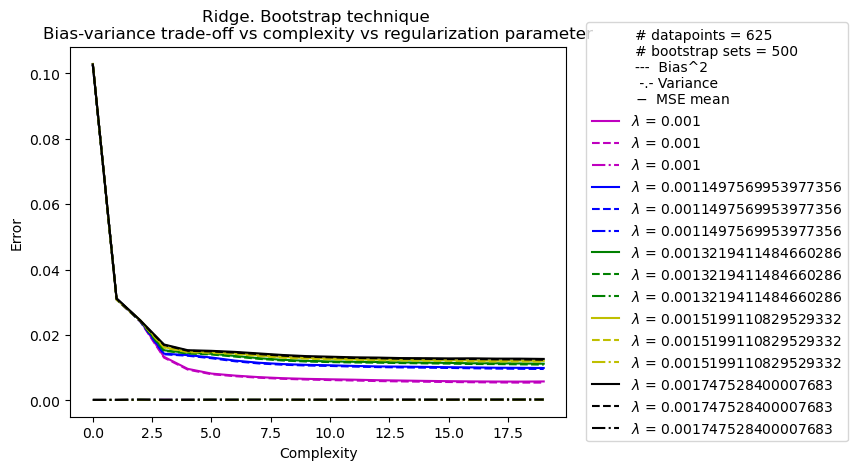

In [15]:
# Plot MSE error train and test
plt.figure(1)
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-'], ['m--' , 'b--', 'g--', 'y--', 'k--'], ['m-.' , 'b-.', 'g-.', 'y-.', 'k-.']))
for i in range(R_nlambdas):
    plt.plot(R_Bs_polydegree, R_Bs_MSE_mean[:,i], color[0,i], label=r'$\lambda$ = {}'.format(R_lmb[i]))
    plt.plot(R_Bs_polydegree, R_Bs_bias[:,i], color[1,i], label=r'$\lambda$ = {}'.format(R_lmb[i]))
    plt.plot(R_Bs_polydegree, R_Bs_variance[:,i], color[2,i], label=r'$\lambda$ = {}'.format(R_lmb[i]))

plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Ridge. Bootstrap technique \n' + 'Bias-variance trade-off vs complexity vs regularization parameter')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title= '# datapoints = {} \n'.format(n_datapoints * n_datapoints) + '# bootstrap sets = {}\n'.format(R_n_boostraps) + '---  Bias^2 \n' + ' -.- Variance \n' + r'$-$  MSE mean ' )
plt.show


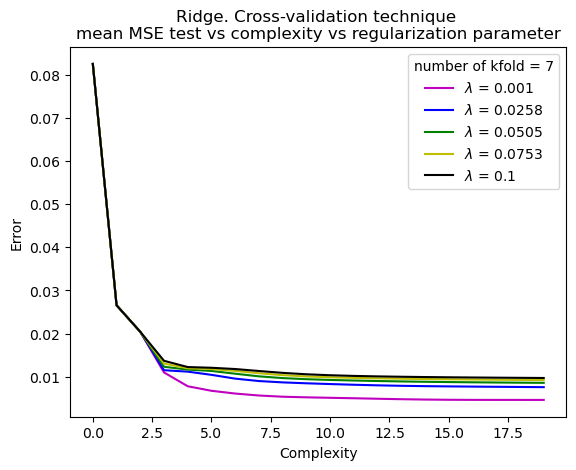

In [20]:
""" RIDGE analysis 
Cross-validation and Bias-variance tradeoff
"""
# Decide degree on polynomial to fit
R_Cs_maxdegree = 20              # Minimum mean square error for the test dataset
R_Cs_polydegree = np.zeros(R_Cs_maxdegree)
R_Cs_nlambdas = 5
R_Cs_lambdas = np.linspace(0.001, 0.1, R_Cs_nlambdas)
# Initialize a KFold instance, choose k in [5,10]
k = 7
R_kfold = KFold(n_splits = k, shuffle=True, random_state= 42)             # shuffle decreases the mean square error
R_KFold_MSE = np.zeros((R_Cs_maxdegree, R_nlambdas))

i = 0
for lmb in R_Cs_lambdas:
    for j in range(R_Cs_maxdegree): 
        # Perform the cross-validation to estimate MSE. Function scaled_validation_scaled() scales the features, function validation_scaled() does not scale the features.
        R_KFold_MSE[j,i] = cross_validation(R_kfold, k, x_y, z_noise, j,'ridge', lmb)
        R_Cs_polydegree[j] = j

    i+= 1

# Plot MSE error test
# Plot MSE error test
plt.figure(1)
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-']))
for i in range(R_Cs_nlambdas):
    plt.plot(R_Cs_polydegree, R_KFold_MSE[:,i], color[i], label=r'$\lambda$ = {:.3}'.format(R_Cs_lambdas[i]))

plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Ridge. Cross-validation technique \n' + 'mean MSE test vs complexity vs regularization parameter')
plt.legend(title='number of kfold = {}'.format(k))
plt.show()


*************************************** LASSO ***************************************

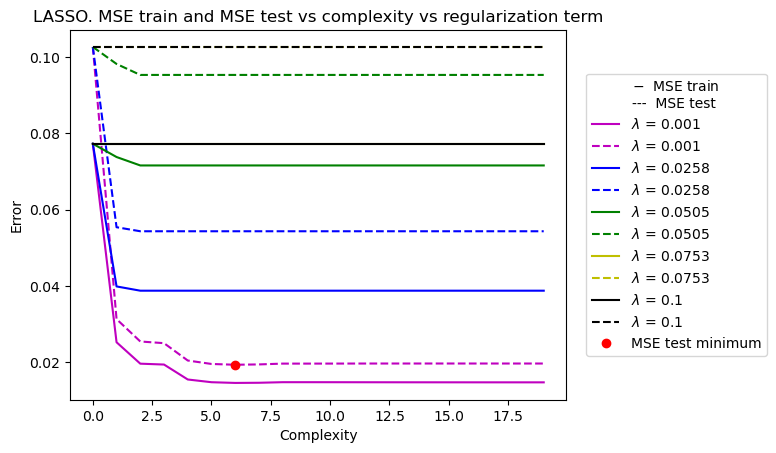

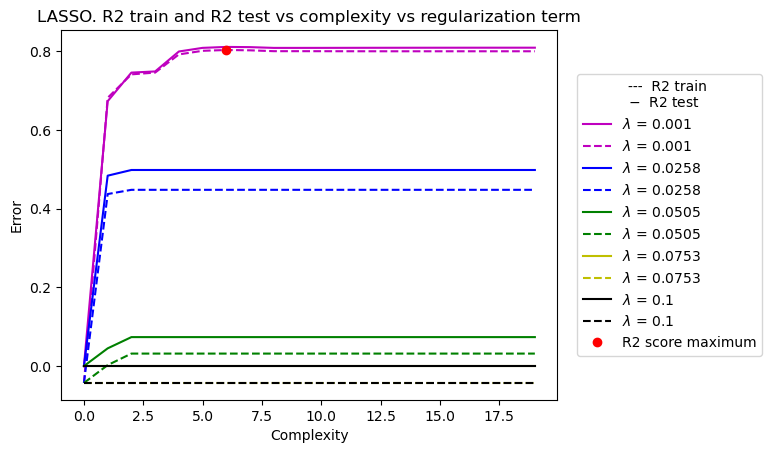

With 625 datapoints, the smallest mean squared error is 0.019355338326810204 and it is obtained with the model with polynomial degree = 6 and regularization term lambda = 0.001,
while the greatest R-squared is 0.8033342181473848 and it is obtained with the model with polynomial degree = 6 and regularization term lambda = 0.001.


In [23]:
""" LASSO analysis: MSE error analysis with respect to the complexity of the model and the hyperparameter (regularization term) 
                    maxdegree is used to analyze the role of model complexity
                    nlmbs is used to analyze the role of the regularization term """

# Hyperparameter initialization
case = 'lasso'
c_rt_las_maxdegree = 20
c_rt_las_nlmbs = 5
c_rt_las_lmb = np.linspace(0.001, 0.1, c_rt_las_nlmbs)

c_rt_las_MSE_train = np.zeros((c_rt_las_maxdegree, c_rt_las_nlmbs))
c_rt_las_MSE_test = np.zeros((c_rt_las_maxdegree, c_rt_las_nlmbs))
c_rt_las_R2_train = np.zeros((c_rt_las_maxdegree, len(c_rt_las_lmb)))
c_rt_las_R2_test = np.zeros((c_rt_las_maxdegree, len(c_rt_las_lmb)))
c_rt_las_polydegree = np.zeros(c_rt_las_maxdegree)


for j, lmb in enumerate(c_rt_las_lmb):
    for i in range(c_rt_las_maxdegree):
        # Computing training and test design matrices
        c_rt_las_design_matrix_train = Design_Matrix_calc(i, x_y_train) 
        c_rt_las_design_matrix_test = Design_Matrix_calc(i, x_y_test)
        
        # Define the model
        c_rt_RegLasso = linear_model.Lasso(lmb, fit_intercept=True, max_iter=100000)
        c_rt_RegLasso.fit(c_rt_las_design_matrix_train, z_train.ravel())
        # Make the prediction 
        c_rt_las_ztilde = c_rt_RegLasso.predict(c_rt_las_design_matrix_train)
        c_rt_las_zpredict = c_rt_RegLasso.predict(c_rt_las_design_matrix_test)
        # Calculation of MSE and R2 of both training and test data sets
        c_rt_las_MSE_train[i,j] = MSE_function(z_train, c_rt_las_ztilde.reshape(len(c_rt_las_ztilde), 1))
        c_rt_las_MSE_test[i,j] = MSE_function(z_test, c_rt_las_zpredict.reshape(len(c_rt_las_zpredict), 1))
        c_rt_las_R2_train[i,j] = R2_function(z_train, c_rt_las_ztilde.reshape(len(c_rt_las_ztilde), 1))
        c_rt_las_R2_test[i,j] = R2_function(z_test, c_rt_las_zpredict.reshape(len(c_rt_las_zpredict), 1))
        
        c_rt_las_polydegree[i] = i

# Seeking for the smallest test MSE
c_rt_las_MSE_min = np.min(c_rt_las_MSE_test)
c_rt_las_MSE_min_position = np.where(c_rt_las_MSE_test == c_rt_las_MSE_test.min())

# Seeking for the greatest test R2 score
c_rt_las_R2_max = np.max(c_rt_las_R2_test)
c_rt_las_R2_max_position = np.where(c_rt_las_R2_test == c_rt_las_R2_test.max())


# Plot MSE error train and test
plt.figure(1)
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-'], ['m--' , 'b--', 'g--', 'y--', 'k--']))
for i in range(len(c_rt_las_lmb)):
    plt.plot(c_rt_las_polydegree, c_rt_las_MSE_train[:,i], color[0,i], label=r'$\lambda$ = {:.3}'.format(c_rt_las_lmb[i]))
    plt.plot(c_rt_las_polydegree, c_rt_las_MSE_test[:,i], color[1,i], label=r'$\lambda$ = {:.3}'.format(c_rt_las_lmb[i]))

plt.plot(c_rt_las_MSE_min_position[0][0], c_rt_las_MSE_min, 'ro', label='MSE test minimum', linewidth = 3)
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('LASSO. MSE train and MSE test vs complexity vs regularization term')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title=r'$-$  MSE train' +  '\n' + '---  MSE test ')
plt.show()


# Plot R-squared error train and test
plt.figure(2)
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-'], ['m--' , 'b--', 'g--', 'y--', 'k--']))
for i in range(len(c_rt_las_lmb)):
    plt.plot(c_rt_las_polydegree, c_rt_las_R2_train[:,i], color[0,i], label=r'$\lambda$ = {:.3}'.format(c_rt_las_lmb[i]))
    plt.plot(c_rt_las_polydegree, c_rt_las_R2_test[:,i], color[1,i], label=r'$\lambda$ = {:.3}'.format(c_rt_las_lmb[i]))

plt.plot(c_rt_las_R2_max_position[0][0], c_rt_las_R2_max, 'ro', label='R2 score maximum', linewidth = 3)
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('LASSO. R2 train and R2 test vs complexity vs regularization term')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title='---  R2 train \n' + r'$-$  R2 test ')
plt.show()

print('With {} datapoints, the smallest mean squared error is {} and it is obtained with the model with polynomial degree = {} and regularization term lambda = {},'.format(n_datapoints*n_datapoints, c_rt_las_MSE_min, c_rt_las_MSE_min_position[0][0], c_rt_las_lmb[c_rt_las_MSE_min_position[1][0]]))
print('while the greatest R-squared is {} and it is obtained with the model with polynomial degree = {} and regularization term lambda = {}.'.format(c_rt_las_R2_max, c_rt_las_R2_max_position[0][0], c_rt_las_lmb[c_rt_las_R2_max_position[1][0]]))

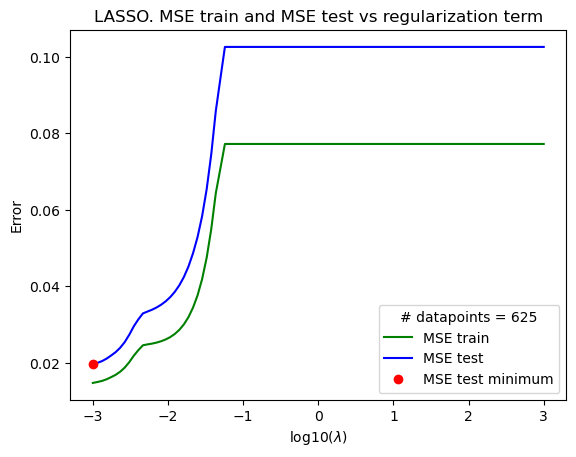

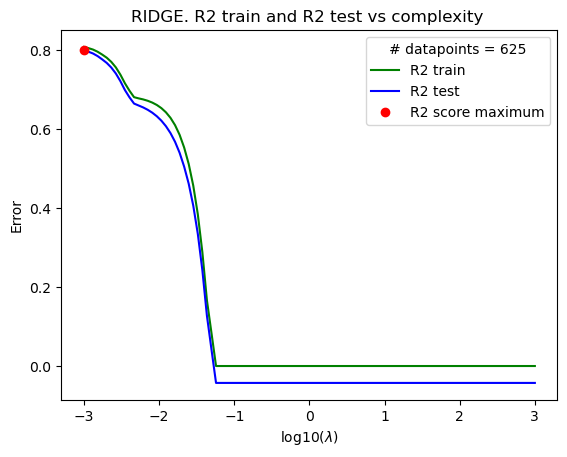

With 625 datapoints, the smallest mean squared error is 0.019653481128971282 and it is obtained with the model with polynomial degree = 9 and regularization term lambda = [0.001],
while the greatest R-squared is 0.800304847836171 and it is obtained with the model with polynomial degree = 9 and regularization term lambda = [0.001].


In [26]:
""" LASSO analysis: MSE error and R-squared analysis with respect to the regularization term 
                    The degree of the polynomial (model complexity) is now fixed. """

# Hyperparameter initialization
case = 'lasso'
las_nlmbs = 100
las_degree = 9
las_lmb = np.logspace(-3, 3, las_nlmbs)

las_MSE_train = np.zeros(len(las_lmb))
las_MSE_test = np.zeros(len(las_lmb))
las_R2_train = np.zeros(len(las_lmb))
las_R2_test = np.zeros(len(las_lmb))

# Training 
las_design_matrix_train = Design_Matrix_calc(las_degree, x_y_train)
# Testing 
las_design_matrix_test = Design_Matrix_calc(las_degree, x_y_test)

for i, lmb in enumerate(las_lmb):
    # Define the model
    RegLasso = linear_model.Lasso(lmb, fit_intercept=True, max_iter=100000)
    RegLasso.fit(las_design_matrix_train, z_train.ravel())
    # Make the prediction 
    las_ztilde = RegLasso.predict(las_design_matrix_train)
    las_zpredict = RegLasso.predict(las_design_matrix_test)
    # Calculation of MSE and R2 of both training and test data sets
    las_MSE_train[i] = MSE_function(z_train, las_ztilde.reshape(len(las_ztilde), 1))
    las_MSE_test[i] = MSE_function(z_test, las_zpredict.reshape(len(las_zpredict), 1))
    las_R2_train[i] = R2_function(z_train, las_ztilde.reshape(len(las_ztilde), 1))
    las_R2_test[i] = R2_function(z_test, las_zpredict.reshape(len(las_zpredict), 1))
# Seeking for the smallest test MSE
las_MSE_min = np.min(las_MSE_test)
las_MSE_min_position = np.where(las_MSE_test == las_MSE_test.min())[0]

# Seeking for the greatest test R2 score
las_R2_max = np.max(las_R2_test)
las_R2_max_position = np.where(las_R2_test == las_R2_test.max())[0]

# Plot MSE error train and test
plt.figure(1)
plt.plot(np.log10(las_lmb), las_MSE_train, 'g-', label='MSE train')
plt.plot(np.log10(las_lmb), las_MSE_test, 'b-', label='MSE test')
plt.plot(np.log10(las_lmb[las_MSE_min_position]), las_MSE_min, 'ro', label='MSE test minimum', linewidth = 3)
plt.xlabel(r'log10($\lambda$)')
plt.ylabel("Error")
plt.title('LASSO. MSE train and MSE test vs regularization term')
plt.legend(title='# datapoints = {}'.format(n_datapoints * n_datapoints))
plt.show()

# Plot R-squared error train and test
plt.figure(2)
plt.plot(np.log10(las_lmb), las_R2_train, 'g-', label='R2 train')
plt.plot(np.log10(las_lmb), las_R2_test, 'b-', label='R2 test')
plt.plot(np.log10(las_lmb[las_R2_max_position]), las_R2_max, 'ro', label='R2 score maximum', linewidth = 3)
plt.xlabel(r'log10($\lambda$)')
plt.ylabel("Error")
plt.title('RIDGE. R2 train and R2 test vs complexity ')
plt.legend(title='# datapoints = {}'.format(n_datapoints * n_datapoints))
plt.show()


print('With {} datapoints, the smallest mean squared error is {} and it is obtained with the model with polynomial degree = {} and regularization term lambda = {},'.format(n_datapoints*n_datapoints, las_MSE_min, las_degree, las_lmb[las_MSE_min_position]))
print('while the greatest R-squared is {} and it is obtained with the model with polynomial degree = {} and regularization term lambda = {}.'.format(las_R2_max, las_degree, las_lmb[las_R2_max_position]))


********************** Regularization parameter: lambda = 0.001. Model complexity: polynomial of degree 0 **********************
Error:1.026773e-01
Bias^2:1.025281e-01
Var:1.492377e-04
1.026773e-01 >= 1.025281e-01 + 1.492377e-04 = 1.026773e-01
********************** Regularization parameter: lambda = 0.001. Model complexity: polynomial of degree 1 **********************
Error:3.140665e-02
Bias^2:3.124069e-02
Var:1.659545e-04
3.140665e-02 >= 3.124069e-02 + 1.659545e-04 = 3.140665e-02
********************** Regularization parameter: lambda = 0.001. Model complexity: polynomial of degree 2 **********************
Error:2.562212e-02
Bias^2:2.542094e-02
Var:2.011784e-04
2.562212e-02 >= 2.542094e-02 + 2.011784e-04 = 2.562212e-02
********************** Regularization parameter: lambda = 0.001. Model complexity: polynomial of degree 3 **********************
Error:2.493467e-02
Bias^2:2.470019e-02
Var:2.344795e-04
2.493467e-02 >= 2.470019e-02 + 2.344795e-04 = 2.493467e-02
********************** R

/opt/anaconda3/envs/Project_python39/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.852e-03, tolerance: 3.792e-03
  model = cd_fast.enet_coordinate_descent(


********************** Regularization parameter: lambda = 0.001. Model complexity: polynomial of degree 19 **********************
Error:1.971047e-02
Bias^2:1.952914e-02
Var:1.813275e-04
1.971047e-02 >= 1.952914e-02 + 1.813275e-04 = 1.971047e-02
********************** Regularization parameter: lambda = 0.025750000000000002. Model complexity: polynomial of degree 0 **********************
Error:1.028490e-01
Bias^2:1.027005e-01
Var:1.484661e-04
1.028490e-01 >= 1.027005e-01 + 1.484661e-04 = 1.028490e-01
********************** Regularization parameter: lambda = 0.025750000000000002. Model complexity: polynomial of degree 1 **********************
Error:5.580255e-02
Bias^2:5.555691e-02
Var:2.456389e-04
5.580255e-02 >= 5.555691e-02 + 2.456389e-04 = 5.580255e-02
********************** Regularization parameter: lambda = 0.025750000000000002. Model complexity: polynomial of degree 2 **********************
Error:5.480066e-02
Bias^2:5.457572e-02
Var:2.249384e-04
5.480066e-02 >= 5.457572e-02 + 2.2493

<function matplotlib.pyplot.show(close=None, block=None)>

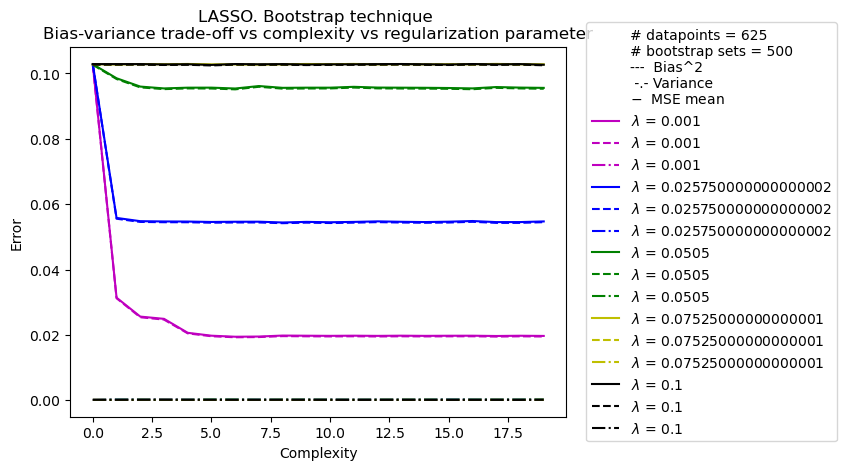

In [28]:
""" LASSO analysis. BOOTSTRAP and c_rt_las_Bias-c_rt_las_variance tradeoff vs complexity vs the regularization parameter"""

# Hyperparameter initialization
case = 'ridge'
c_rt_las_n_boostraps = 500       # number of bootstrap sets
c_rt_las_maxdegree = 20
c_rt_las_nlmbs = 5
c_rt_las_Bs_lmbs = np.linspace(0.001, 0.1, c_rt_las_nlmbs)

# The following (m x n_bootstraps) matrices holds the column vectors y_pred for each bootstrap iteration.

c_rt_R_MSE_mean = np.zeros((c_rt_las_maxdegree, c_rt_las_nlmbs))
c_rt_R_Bs_polydegree = np.zeros(c_rt_las_maxdegree)

# The following (m x n_bootstraps) matrix holds the column vectors y_pred for each bootstrap iteration.
c_rt_las_bias = np.zeros((c_rt_las_maxdegree, c_rt_las_nlmbs))
c_rt_las_variance = np.zeros((c_rt_las_maxdegree, c_rt_las_nlmbs))
c_rt_las_MSE_mean = np.zeros((c_rt_las_maxdegree, c_rt_las_nlmbs))
c_rt_las_Bs_polydegree = np.zeros(c_rt_las_maxdegree)


for i, lmb in enumerate(c_rt_las_Bs_lmbs):
    # Computing MSE train and test
    for j in range(c_rt_las_maxdegree):
        c_rt_las_MSE_mean[j,i], c_rt_las_z_pred =  bootstrap(c_rt_las_n_boostraps, j, x_y_train, z_train, x_y_test, z_test, 'lasso', lmb)
        c_rt_las_bias[j,i] = np.mean( (z_test - np.mean(c_rt_las_z_pred, axis=1, keepdims=True))**2 )
        c_rt_las_variance[j,i] = np.mean( np.var(c_rt_las_z_pred, axis=1, keepdims=True) )
        c_rt_las_Bs_polydegree[j] = j
        
        print('********************** Regularization parameter: lambda = {}. Model complexity: polynomial of degree {} **********************'.format(lmb, j))
        print('Error:{:e}'.format(c_rt_las_MSE_mean[j,i]))
        print('Bias^2:{:e}'.format(c_rt_las_bias[j,i]))
        print('Var:{:e}'.format(c_rt_las_variance[j,i]))
        print('{:e} >= {:e} + {:e} = {:e}'.format(c_rt_las_MSE_mean[j,i], c_rt_las_bias[j,i], c_rt_las_variance[j,i], c_rt_las_bias[j,i]+ c_rt_las_variance[j,i]))

# Plot mean MSE, bias^2 and variance 
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-'], ['m--' , 'b--', 'g--', 'y--', 'k--'], ['m-.' , 'b-.', 'g-.', 'y-.', 'k-.']))
for i in range(c_rt_las_nlmbs):
    plt.plot(c_rt_las_Bs_polydegree, c_rt_las_MSE_mean[:,i], color[0,i], label=r'$\lambda$ = {}'.format(c_rt_las_Bs_lmbs[i]))
    plt.plot(c_rt_las_Bs_polydegree, c_rt_las_bias[:,i], color[1,i], label=r'$\lambda$ = {}'.format(c_rt_las_Bs_lmbs[i]))
    plt.plot(c_rt_las_Bs_polydegree, c_rt_las_variance[:,i], color[2,i], label=r'$\lambda$ = {}'.format(c_rt_las_Bs_lmbs[i]))
  
plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('LASSO. Bootstrap technique \n' + 'Bias-variance trade-off vs complexity vs regularization parameter')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title= '# datapoints = {} \n'.format(n_datapoints * n_datapoints) + '# bootstrap sets = {}\n'.format(c_rt_las_n_boostraps) + '---  Bias^2 \n' + ' -.- Variance \n' + r'$-$  MSE mean ' )
plt.show

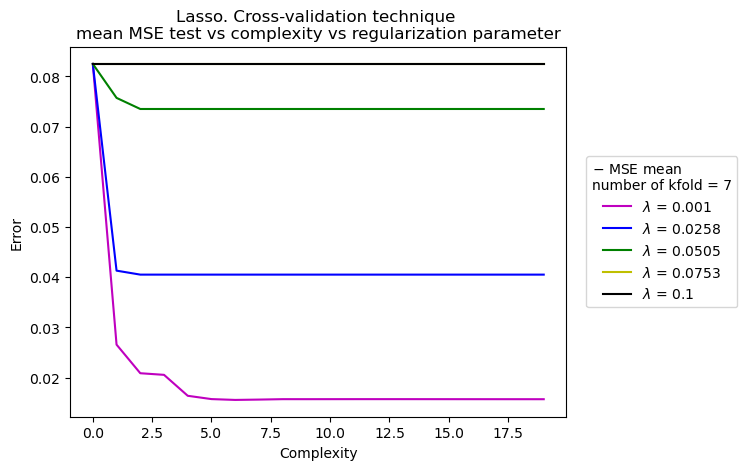

In [37]:
""" LASSO analysis. Cross-validation and Bias-variance tradeoff.  MSE error vs complexity vs regularization term """

# Hyperparameter initialization
case = 'lasso'
c_rt_las_Cs_maxdegree = 20             
c_rt_las_Cs_nlmbs = 5
c_rt_las_Cs_lmbs = np.linspace(0.001, 0.1, c_rt_las_Cs_nlmbs)
# Initialize a KFold instance, choose k in [5,10]
c_rt_las_k = 7
c_rt_las_kfold = KFold(n_splits = c_rt_las_k, shuffle=True, random_state= 42)             # shuffle decreases the mean square error

c_rt_las_KFold_MSE = np.zeros((c_rt_las_Cs_maxdegree, c_rt_las_Cs_nlmbs))
c_rt_las_Cs_polydegree = np.zeros(c_rt_las_Cs_maxdegree)


for i,lmb in enumerate(c_rt_las_Cs_lmbs):
    for j in range(c_rt_las_Cs_maxdegree):
    # Perform the cross-validation to estimate MSE.Function scaled_validation_scaled() scales the features, function validation_scaled() does not scale the features.
        c_rt_las_KFold_MSE[j,i] = cross_validation(c_rt_las_kfold, c_rt_las_k, x_y, z_noise, j, 'lasso', lmb)
        c_rt_las_Cs_polydegree[j] = j
    

# Plot mean MSE error test vs complexity vs regularization parameter
plt.figure(1)
color = np.array((['m-' , 'b-', 'g-', 'y-', 'k-']))
for i in range(c_rt_las_nlmbs):
    plt.plot(c_rt_las_Cs_polydegree, c_rt_las_KFold_MSE[:,i], color[i], label=r'$\lambda$ = {:.3}'.format(c_rt_las_Cs_lmbs[i]))

plt.xlabel("Complexity")
plt.ylabel("Error")
plt.title('Lasso. Cross-validation technique \n' + 'mean MSE test vs complexity vs regularization parameter')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title=r'$-$ MSE mean' + '\n' + 'number of kfold = {}'.format(c_rt_las_k))
plt.show()



In [36]:
n = 10 
a = np.arange(0,n)
print(a.shape)


(10,)
